<a href="https://colab.research.google.com/github/uankit/CNN/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning Data 
# Data Source : https://bitbucket.org/jadslim/german-traffic-signs


In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout , Flatten
from keras.layers.convolutional import Conv2D , MaxPooling2D
import pickle
import random

# EDA

In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p' , 'rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p' , 'rb') as f:
  valid_data = pickle.load(f)

with open('german-traffic-signs/test.p' , 'rb') as f:
  test_data = pickle.load(f)

X_train , y_train = train_data['features']  , train_data['labels']
X_valid , y_valid = valid_data['features']  , valid_data['labels']
X_test , y_test = test_data['features']  , test_data['labels']

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


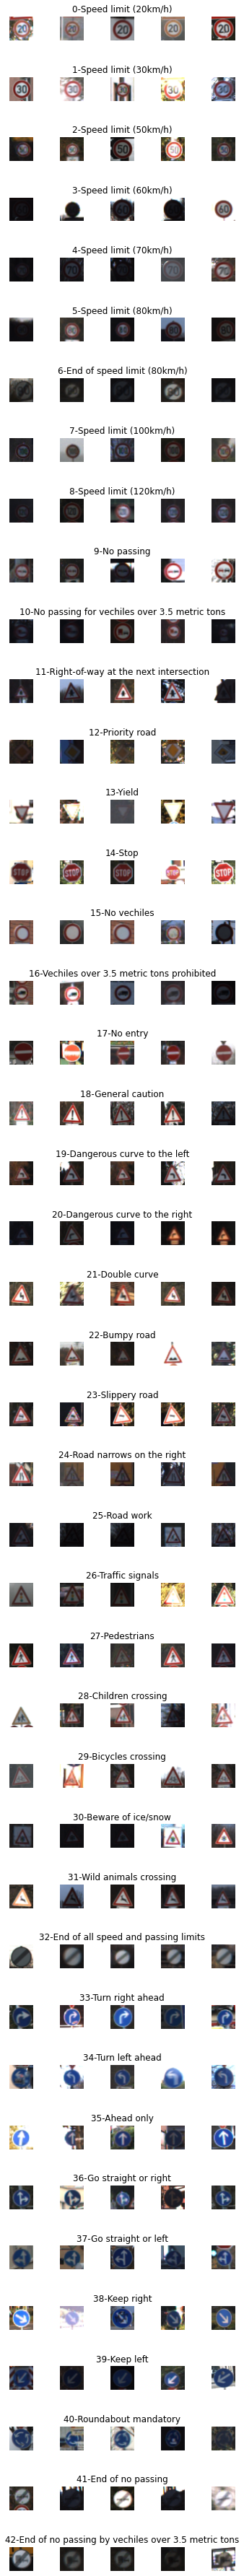

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

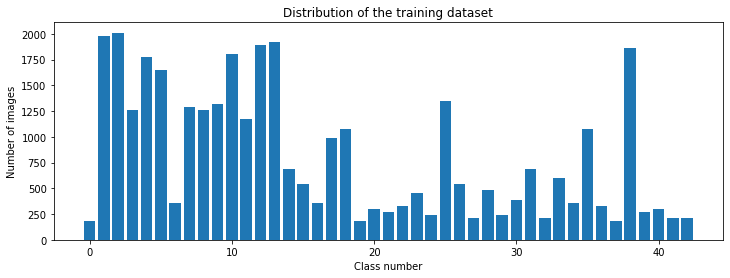

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


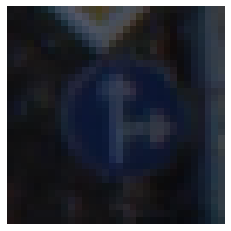

In [ ]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


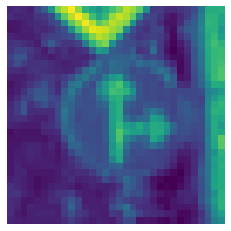

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


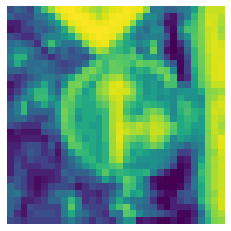

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

# Preprocessing Data

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing , X_train)))
X_valid = np.array(list(map(preprocessing , X_valid)))
X_test = np.array(list(map(preprocessing , X_test)))

(34799, 32, 32)


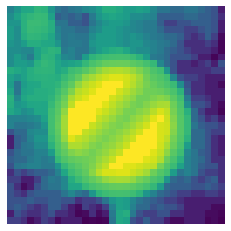

In [ ]:
plt.imshow(X_train[random.randint(0 , len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799 , 32, 32, 1)
X_valid = X_valid.reshape(4410 , 32, 32, 1)
X_test = X_test.reshape(12630 , 32, 32, 1)

# Data Augmentation

(15, 32, 32, 1)


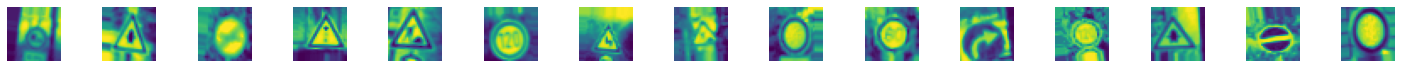

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [ ]:
y_train = to_categorical(y_train , 43)
y_valid = to_categorical(y_valid , 43)
y_test = to_categorical(y_test , 43)

# CNN MODEL

In [ ]:
def cnn():
  model = Sequential()
  model.add(Conv2D(70 , (5,5) , input_shape=(32,32,1) , activation='relu'))
  model.add(Conv2D(70 , (5,5) , activation='relu'))
  

  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(50 , (3,3) , activation = 'relu'))
  model.add(Conv2D(50 , (3,3) , activation = 'relu'))


  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Flatten())
  model.add(Dense(18000 , activation='relu'))
  model.add(Dropout(0.7))
  model.add(Dense(num_classes , activation='softmax'))
  model.compile(Adam(lr=0.001) , loss='categorical_crossentropy' , metrics=['accuracy'])
  
  return model

In [ ]:
model = cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 70)        1820      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 70)        122570    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 70)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 50)        31550     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=X_train.shape[0]//50,
                            epochs=10,
                            validation_data=(X_valid, y_valid), shuffle = 1)

Epoch 1/10
695/695 [==============================] - 13s 19ms/step - loss: 0.1686 - accuracy: 0.9487 - val_loss: 0.1171 - val_accuracy: 0.9726
Epoch 2/10
695/695 [==============================] - 13s 19ms/step - loss: 0.1409 - accuracy: 0.9560 - val_loss: 0.0545 - val_accuracy: 0.9848
Epoch 3/10
695/695 [==============================] - 13s 19ms/step - loss: 0.1143 - accuracy: 0.9645 - val_loss: 0.0782 - val_accuracy: 0.9871
Epoch 4/10
695/695 [==============================] - 13s 19ms/step - loss: 0.1071 - accuracy: 0.9673 - val_loss: 0.1273 - val_accuracy: 0.9678
Epoch 5/10
695/695 [==============================] - 13s 19ms/step - loss: 0.0963 - accuracy: 0.9711 - val_loss: 0.0660 - val_accuracy: 0.9841
Epoch 6/10
695/695 [==============================] - 13s 19ms/step - loss: 0.0883 - accuracy: 0.9736 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 7/10
695/695 [==============================] - 13s 19ms/step - loss: 0.0847 - accuracy: 0.9757 - val_loss: 0.0607 - val_accuracy:

# Model Performance 

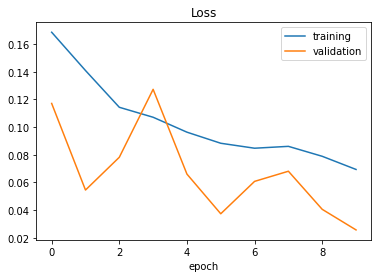

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training' , 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

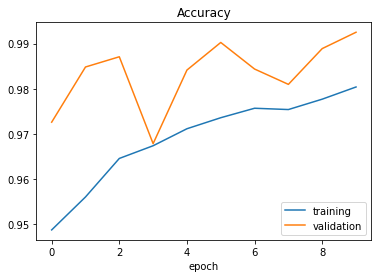

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training' , 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
score = model.evaluate(X_test , y_test , verbose=0)

print('Test Score' , score[0])
print('Test Accuracy' , score[1])

Test Score 0.11565148085355759
Test Accuracy 0.9762470126152039


# TESTING ON RANDOM TRAFFIC SIGN IMAGES

In [ ]:

# https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

# https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

# https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

# https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

# https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg


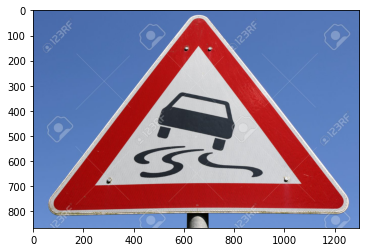

In [ ]:
#fetch image
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


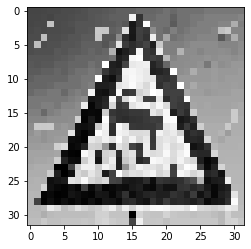

In [ ]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)

In [ ]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [23]
